# **Data Understanding**

Data yang digunakan pada model ini data brilliant diamond dari kaggle.

Url sumber data : https://www.kaggle.com/miguelcorraljr/brilliant-diamonds/download
*   Dataset           : 119307 data
*   Fitur categorical : shape, cut, color, clarity, report, type dan date_fetched
*   Fitur numerical   : carat
*   Fitur targer      : price



## **Data Loading**


### Import Library
Pada bagian ini saya mengimport library yang saya butuhkan untuk membaca file data

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import shutil

### Mempersiapkan dataset
Pada bagian ini saya mendownload dataset langsung dari kaggle kemudian menampilkannya, dataset saya gunakan yaitu diamond_dataset.csv

In [ ]:
!pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devisdestiannugraha","key":"bee36c4a86c43a4117f92345da40f1e2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls  ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d miguelcorraljr/brilliant-diamonds

  0% 0.00/1.45M [00:00<?, ?B/s]
100% 1.45M/1.45M [00:00<00:00, 47.4MB/s]


In [ ]:
!unzip -qq brilliant-diamonds.zip

In [ ]:
df = pd.read_csv('/content/diamonds_dataset.csv')
df

,id,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
...,...,...,...,...,...,...,...,...,...,...,...
119302,10081678,https://www.brilliantearth.com//lab-diamonds-s...,Round,99040,5.71,Super Ideal,D,VVS2,GCAL,lab,2020-11-29 12-26 PM
119303,9521564,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,107330,15.32,Very Good,G,SI2,IGI,lab,2020-11-29 12-26 PM
119304,9896730,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,110110,10.05,Ideal,D,SI2,IGI,lab,2020-11-29 12-26 PM
119305,9756570,https://www.brilliantearth.com//lab-diamonds-s...,Oval,126030,10.33,Fair,D,VS2,IGI,lab,2020-11-29 12-26 PM


In [ ]:
df1 = df.drop('id',axis=1)
df1

,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
...,...,...,...,...,...,...,...,...,...,...
119302,https://www.brilliantearth.com//lab-diamonds-s...,Round,99040,5.71,Super Ideal,D,VVS2,GCAL,lab,2020-11-29 12-26 PM
119303,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,107330,15.32,Very Good,G,SI2,IGI,lab,2020-11-29 12-26 PM
119304,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,110110,10.05,Ideal,D,SI2,IGI,lab,2020-11-29 12-26 PM
119305,https://www.brilliantearth.com//lab-diamonds-s...,Oval,126030,10.33,Fair,D,VS2,IGI,lab,2020-11-29 12-26 PM


In [ ]:
berlian = df1.drop('url',axis=1)
berlian

,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
...,...,...,...,...,...,...,...,...,...
119302,Round,99040,5.71,Super Ideal,D,VVS2,GCAL,lab,2020-11-29 12-26 PM
119303,Cushion,107330,15.32,Very Good,G,SI2,IGI,lab,2020-11-29 12-26 PM
119304,Cushion,110110,10.05,Ideal,D,SI2,IGI,lab,2020-11-29 12-26 PM
119305,Oval,126030,10.33,Fair,D,VS2,IGI,lab,2020-11-29 12-26 PM


## **Deskripsi Variable**
Pada dataset diamond_dataset.csv terdapat beberapa variabel, yaitu :


*   Price, dalam mata uang dolar AS ($) adalah fitur target
*   Carat, merepresentasikan besar dari berlian
*   Shape, merepresentasikan bentuk dari berlian
*   Cut, merepresentasikan kualitas pemotongan berlian
*   clarity, merepresentasikan kejernihan berlian
*   report, merepresentasikan sertifikat berlian
*   type, merepresentasikan berlian natural/sintetis
*   date_fetched, merepresentasikan tanggal diambilnya berlian



In [ ]:
berlian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119307 entries, 0 to 119306
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   shape         119307 non-null  object 
 1   price         119307 non-null  int64  
 2   carat         119307 non-null  float64
 3   cut           119307 non-null  object 
 4   color         119307 non-null  object 
 5   clarity       119307 non-null  object 
 6   report        119307 non-null  object 
 7   type          119307 non-null  object 
 8   date_fetched  119307 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.2+ MB


In [ ]:
berlian.describe()

,price,carat
count,1.193070e+05,119307.000000
mean,3.286843e+03,0.884169
std,9.114695e+03,0.671141
min,2.700000e+02,0.250000
25%,9.000000e+02,0.400000
50%,1.770000e+03,0.700000
75%,3.490000e+03,1.100000
max,1.348720e+06,15.320000


## **Menangani Outliers**
Pada bagian ini saya menangani apabila ada sample yang nilainya diluar cakupan yang kemunculannya sangat jarang dan berbeda dari yang lainnya.
Disini saya menggunakan metode IQR Method

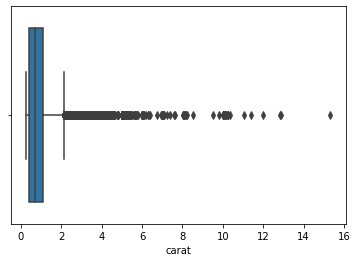

In [ ]:
sns.boxplot(x=berlian['carat'])

In [ ]:
Q1 = berlian.quantile(0.25)
Q3 = berlian.quantile(0.75)
IQR=Q3-Q1
berlian=berlian[~((berlian<(Q1-1.5*IQR))|(berlian>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
berlian.shape

(107906, 9)

## **Univariate Analysis**
pada bagian ini saya melakukan proses analisis data dengan teknik Univariate EDA, membagi menjadi numerical features dan categorical features

In [ ]:
numerical_features = ['price', 'carat']
categorical_features = ['shape', 'cut', 'color', 'clarity', 'report', 'type', 'date_fetched']

### Numerical Features

          jumlah sampel  persentase
Round             70427        65.3
Oval              10987        10.2
Pear               8720         8.1
Emerald            5909         5.5
Princess           4526         4.2
Cushion            3138         2.9
Marquise           1684         1.6
Heart              1245         1.2
Radiant             829         0.8
Asscher             441         0.4


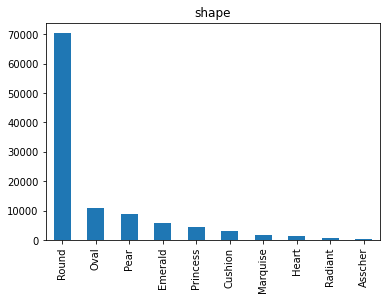

In [ ]:
feature = categorical_features[0]
count = berlian[feature].value_counts()
percent = 100*berlian[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

             jumlah sampel  persentase
Super Ideal          49193        45.6
Ideal                35932        33.3
Very Good            19349        17.9
Good                  3113         2.9
Fair                   319         0.3


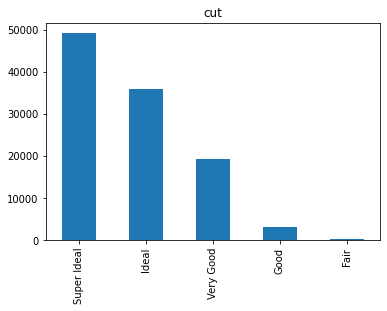

In [ ]:
feature = categorical_features[1]
count = berlian[feature].value_counts()
percent = 100*berlian[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
E          22676        21.0
D          19123        17.7
F          17768        16.5
G          15576        14.4
I          13248        12.3
H          11382        10.5
J           8133         7.5


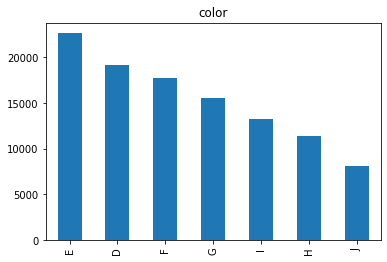

In [ ]:
feature = categorical_features[2]
count = berlian[feature].value_counts()
percent = 100*berlian[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Categorical Features

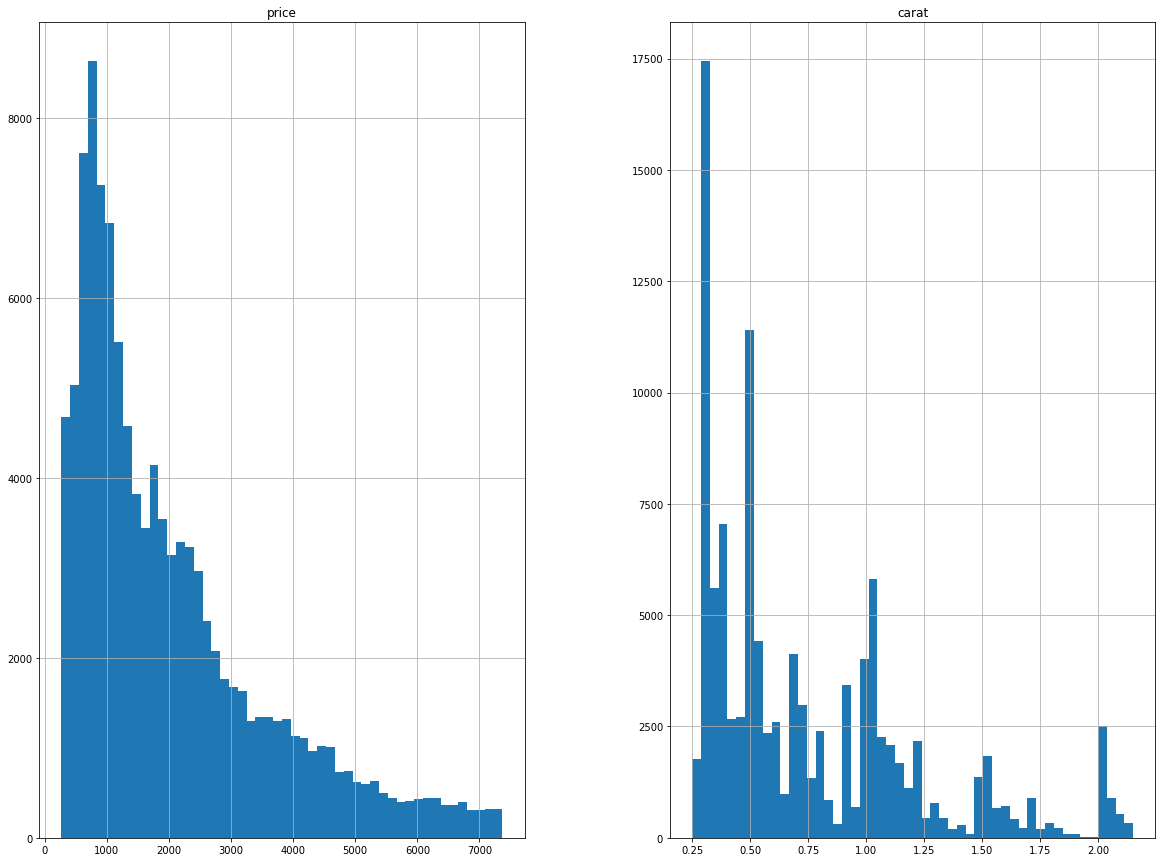

In [ ]:
berlian.hist(bins=50, figsize=(20,15))
plt.show()

## **Multivariate Analysis**
Pada bagian ini saya melakukan analisis data pada fitur kategori dan numerik untuk menunjukkan hubungan dua variabel (bivariate EDA)

### Categorical Features


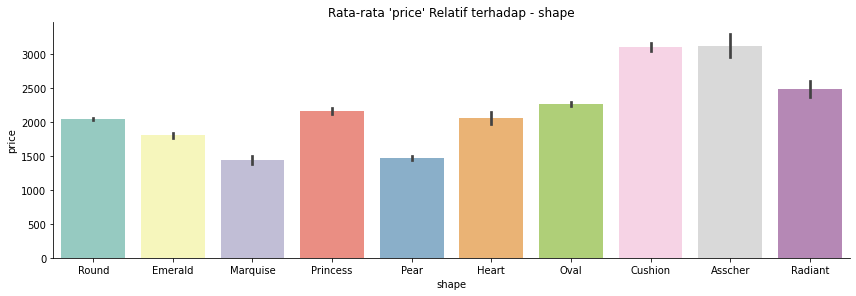

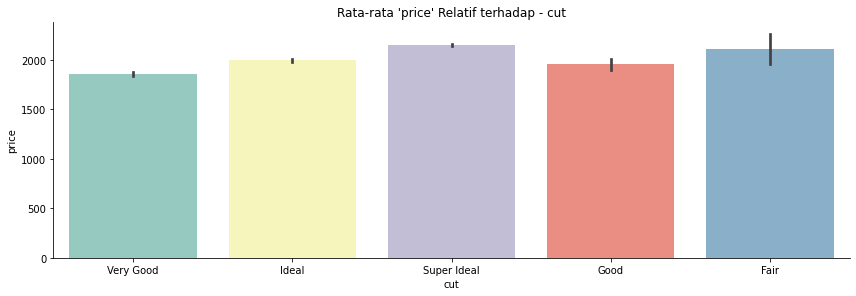

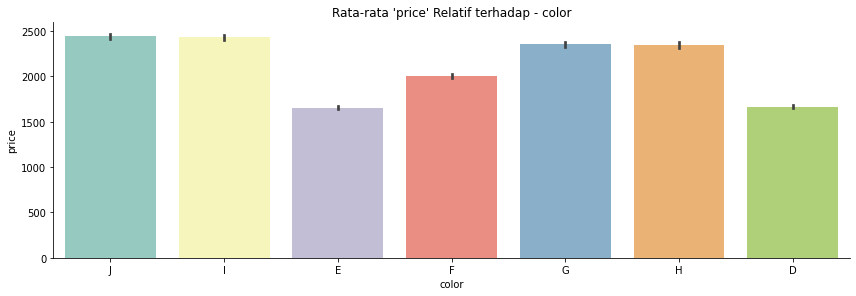

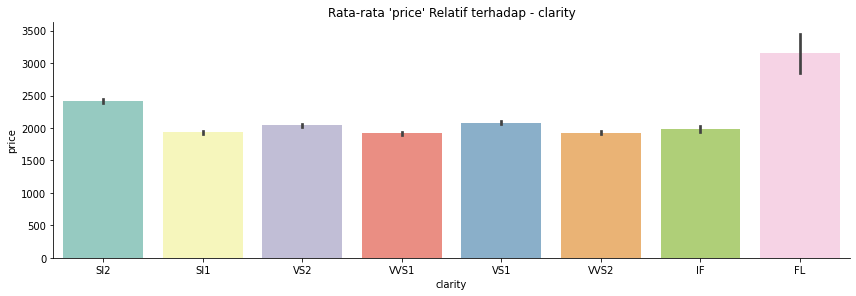

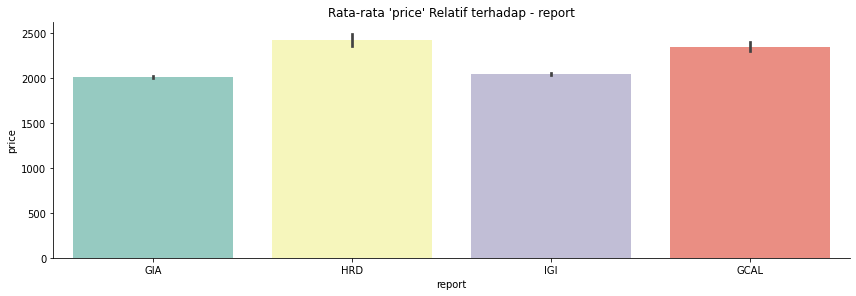

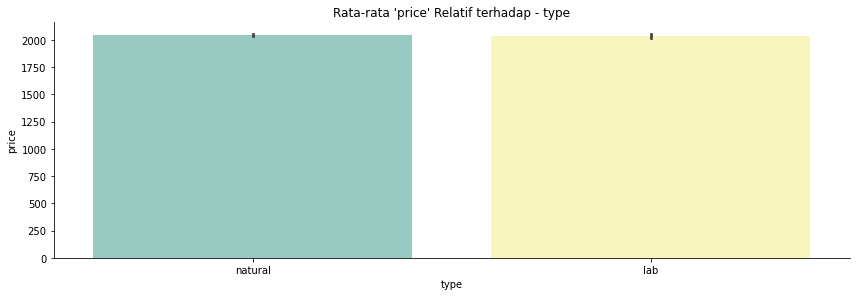

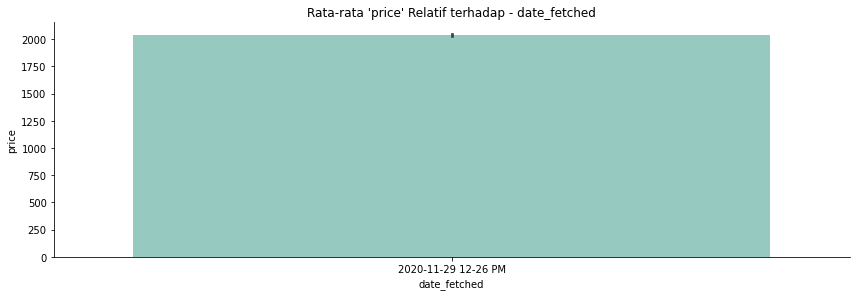

In [ ]:
cat_features = berlian.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=berlian, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

### Numerical Features


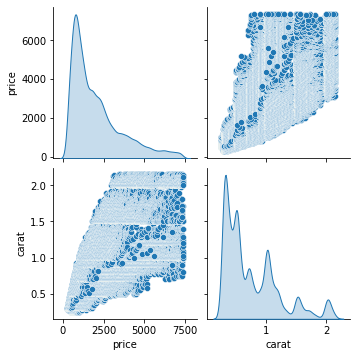

In [ ]:
sns.pairplot(berlian, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

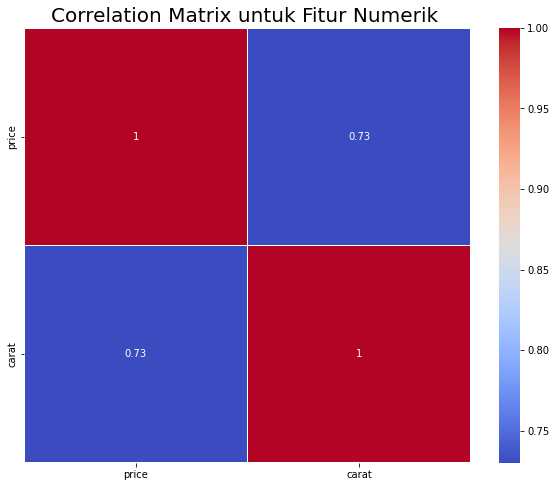

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = berlian.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# **Data Preparation**
Pada bagian ini saya melakukan proses transformasi pada data, antara lain :


*   Encoding Fitur Kategori, pada proses ini saya menggunakan teknik one-hot-encoding
*   Pembagian dataset dengan fitur train_test_split dari library sklearn
*   Standarisasi




## **Encoding Fitur Kategori (one-hot-encoding)**

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
berlian = pd.concat([berlian, pd.get_dummies(berlian['shape'], prefix='shape', drop_first=True)],axis=1)
berlian = pd.concat([berlian, pd.get_dummies(berlian['cut'], prefix='cut', drop_first=True)],axis=1)
berlian = pd.concat([berlian, pd.get_dummies(berlian['color'], prefix='color', drop_first=True)],axis=1)
berlian = pd.concat([berlian, pd.get_dummies(berlian['clarity'], prefix='clarity', drop_first=True)],axis=1)
berlian = pd.concat([berlian, pd.get_dummies(berlian['report'], prefix='report', drop_first=True)],axis=1)
berlian = pd.concat([berlian, pd.get_dummies(berlian['type'], prefix='type', drop_first=True)],axis=1)
berlian = pd.concat([berlian, pd.get_dummies(berlian['date_fetched'], prefix='date_fetched', drop_first=True)],axis=1)
berlian.drop(['shape', 'cut', 'color', 'clarity', 'report', 'type', 'date_fetched'], axis=1, inplace=True)
berlian.head()

,price,carat,shape_Cushion,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,cut_Good,cut_Ideal,cut_Super Ideal,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,report_GIA,report_HRD,report_IGI,type_natural
0,400,0.30,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
1,400,0.31,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
2,400,0.30,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
3,400,0.30,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
4,400,0.30,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


## **Train Test Split**


In [ ]:
from sklearn.model_selection import train_test_split
 
X = berlian.drop(["price"],axis =1)
y = berlian["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 107906
Total # of sample in train dataset: 97115
Total # of sample in test dataset: 10791


## **Standarisasi**

In [ ]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['carat']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,carat
40164,-0.477224
93357,0.811917
3345,-0.979771
38088,-0.105777
46499,-0.542774


In [ ]:
X_train[numerical_features].describe().round(4)

,carat
count,97115.0000
mean,-0.0000
std,1.0000
min,-1.0890
25%,-0.7613
50%,-0.3898
75%,0.5716
max,3.0625


# **Modelling**
Pada tahap ini saya mengembangkan model machine learning dengan tiga algoritma, kemudian mengevaluasi performa masing-masing algoritma dan menentukan hasil terbaik.

Algoritma yang digunakan :

*   K-Nearest Neighbor
*   Random Forest
*   Boosting Algoritm



In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

## **K-Nearest Neighbor**
pada algoritma kkn ini bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih jumlah k-tetangga terdekat.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

## **Random Forest**
pada algoritma ini menggunakan teknik bagging dari algoritma decision tree.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## **Boosting Algoritm**
pada algoritma ini bekerja dengan membangun model dari data latih, kemudian membuat model kedua untuk memperbaiki model pertama.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# **Model Evaluation**
Pada bagian ini saya akan mengevaluasi hasil dari model regresi dengan membandingkan hasil prediksi dari tiga algoritma KKN, RF dan Boosting. Metrik yang digunakan pada prediksi ini adalah MSE (Mean Squared Error) yang menghitung selisih rata-rata nilai sebenarnya dengan nilai prediksi.

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,119.613,149.591
RF,32.1256,49.4789
Boosting,484.457,474.958


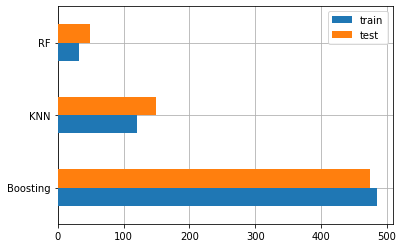

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
45580,2430,2424.0,2561.4,2168.3
